In [ ]:
import nltk
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk import ngrams
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords 
import string
import re


In [ ]:
print (len(movie_reviews.fileids()))
print (movie_reviews.categories()) 
print (len(movie_reviews.fileids('pos')))
print (len(movie_reviews.fileids('neg')))

2000
['neg', 'pos']
1000
1000


In [ ]:
all_words = [word.lower() for word in movie_reviews.words()]
# print first 10 words
print (all_words[:10])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']


In [ ]:
stopwords_english = stopwords.words('english')

# clean words, i.e. remove stopwords and punctuation
def clean_words(words, stopwords_english):
    words_clean = []
    for word in words:
        word = word.lower()
        if word not in stopwords_english and word not in string.punctuation:
            words_clean.append(word)
      
    return words_clean 

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from bs4 import BeautifulSoup

In [ ]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
 

In [ ]:
# feature extractor function for unigram
def bag_of_words(words):    
    words_dictionary = dict([word, True] for word in words)    
    return words_dictionary

In [ ]:
def bag_of_ngrams(words, n=2):
    words_ng = []
    for item in iter(ngrams(words, n)):
        words_ng.append(item)
    words_dictionary = dict([word, True] for word in words_ng)    
    return words_dictionary

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Examples
text = "It was a very good movie."
words = word_tokenize(text.lower())
 
print (words)


['it', 'was', 'a', 'very', 'good', 'movie', '.']


In [ ]:
# working with cleaning words
# i.e. removing stopwords and punctuation
words_clean = clean_words(words, stopwords_english)
print (words_clean)

['good', 'movie']


In [ ]:
important_words = ['above', 'below', 'off', 'over', 'under', 'more', 'most', 'such', 'no', 'nor', 'not', 'only', 'so', 'than', 'too', 'very', 'just', 'but']
 
stopwords_english_for_bigrams = set(stopwords_english) - set(important_words)
 
words_clean_for_bigrams = clean_words(words, stopwords_english_for_bigrams)
print (words_clean_for_bigrams)

['very', 'good', 'movie']


In [ ]:
# We will use general stopwords for unigrams 
# And special stopwords list for bigrams
unigram_features = bag_of_words(words_clean)
print (unigram_features)

{'good': True, 'movie': True}


In [ ]:
bigram_features = bag_of_ngrams(words_clean_for_bigrams)
print (bigram_features)

{('very', 'good'): True, ('good', 'movie'): True}


In [ ]:
all_features = unigram_features.copy()
all_features.update(bigram_features)
print (all_features)


{'good': True, 'movie': True, ('very', 'good'): True, ('good', 'movie'): True}


In [ ]:
def bag_of_all_words(words, n=2):
    words_clean = clean_words(words, stopwords_english)
    words_clean_for_bigrams = clean_words(words, stopwords_english_for_bigrams)
 
    unigram_features = bag_of_words(words_clean)
    bigram_features = bag_of_ngrams(words_clean_for_bigrams)
 
    all_features = unigram_features.copy()
    all_features.update(bigram_features)
 
    return all_features
 
print (bag_of_all_words(words))

{'good': True, 'movie': True, ('very', 'good'): True, ('good', 'movie'): True}


In [ ]:
from nltk.corpus import movie_reviews 


In [ ]:
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append(words)
 
neg_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append(words)


In [ ]:
# positive reviews feature set
pos_reviews_set = []
for words in pos_reviews:
    pos_reviews_set.append((bag_of_all_words(words), 'pos'))
 
# negative reviews feature set
neg_reviews_set = []
for words in neg_reviews:
    neg_reviews_set.append((bag_of_all_words(words), 'neg'))

In [ ]:
print (len(pos_reviews_set), len(neg_reviews_set)) # Output: (1000, 1000)
 
# radomize pos_reviews_set and neg_reviews_set
# doing so will output different accuracy result everytime we run the program
from random import shuffle 
shuffle(pos_reviews_set)
shuffle(neg_reviews_set)
 
test_set = pos_reviews_set[:200] + neg_reviews_set[:200]
train_set = pos_reviews_set[200:] + neg_reviews_set[200:]
 
print(len(test_set),  len(train_set)) # Output: (400, 1600)

1000 1000
400 1600


In [ ]:
from nltk import classify
from nltk import NaiveBayesClassifier

In [ ]:
classifier = NaiveBayesClassifier.train(train_set)
 
accuracy = classify.accuracy(classifier, test_set)
print(accuracy) # Output: 0.8025
 
print (classifier.show_most_informative_features(10))    


0.7625
Most Informative Features
               insulting = True              neg : pos    =     15.7 : 1.0
                   sucks = True              neg : pos    =     15.0 : 1.0
        ('one', 'worst') = True              neg : pos    =     12.6 : 1.0
             outstanding = True              pos : neg    =     11.9 : 1.0
               stupidity = True              neg : pos    =     11.4 : 1.0
       ('bad', 'acting') = True              neg : pos    =     11.0 : 1.0
    ('quite', 'frankly') = True              neg : pos    =     11.0 : 1.0
               affecting = True              pos : neg    =     11.0 : 1.0
                 idiotic = True              neg : pos    =     10.6 : 1.0
               atrocious = True              neg : pos    =     10.3 : 1.0
None


In [ ]:
custom_review = "I hated the film. It was a disaster. Poor direction, bad acting."
custom_review_tokens = word_tokenize(custom_review)
custom_review_set = bag_of_all_words(custom_review_tokens)
print (classifier.classify(custom_review_set))

neg


In [ ]:
# probability result
prob_result = classifier.prob_classify(custom_review_set)
print (prob_result) # Output: <ProbDist with 2 samples>
print (prob_result.max()) # Output: neg
print (prob_result.prob("neg"))
print (prob_result.prob("pos"))

<ProbDist with 2 samples>
neg
0.8753102763993712
0.12468972360063019


In [ ]:
custom_review = "@rachitattweet @summitkhanna Mansukh vasava winning this seat for last 4 election. Its more about vasava tribal vot… https://t.co/4VH3MtJp3E"

custom_review_tokens = word_tokenize(custom_review)
custom_review_set = bag_of_all_words(custom_review_tokens)
 
print (classifier.classify(custom_review_set))

neg


In [ ]:
# probability result
prob_result = classifier.prob_classify(custom_review_set)
print (prob_result) # Output: <ProbDist with 2 samples>
print (prob_result.max()) # Output: pos
print (prob_result.prob("neg")) 
print (prob_result.prob("pos")) 

<ProbDist with 2 samples>
neg
0.5166741715678893
0.4833258284321096


In [ ]:
import sys, tweepy

In [ ]:
ConsumerKey ="Your_consumer_key"
ConsumerSecret ="Your_consumer_secret_key"
accessToken ="Your_access_token"
accessTokenSecret ="Your_access_token_secret_key"
auth = tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
text = input("Enter movie name: ")
public_tweets = api.search(text)


Enter movie name: total dhamaal


In [ ]:
test_result = []
for tweet in public_tweets:
    test_result.append(tweet_cleaner(tweet.text))
  
    
test_result

['rt if vimal fans thinks that ajay devgan has stardom then de de pyaar de shld cross totaldhamaal as total dhamaal was tim',
 'rt film critic taran adarsh has given a fantastic rating to avengersengame in his review the other movie he had thoroughly',
 'akholic nhi canadian tha tabhi to superhit nhi hui franchise ki last movie zyada chslti ha',
 'film critic taran adarsh has given a fantastic rating to avengersengame in his review the other movie he had thor',
 'you ve no right to be in office sc to assam chief secretary india news india',
 'rt if vimal fans thinks that ajay devgan has stardom then de de pyaar de shld cross totaldhamaal as total dhamaal was tim',
 'box office collection of total dhamaal total dhamaal worldwide collection box office',
 'jay fannepal off india uncle zinda ho total dhamaal ko cross kar chuka hain',
 'rt set to score a rom com success with after adventure comedy totaldhamaal ajaydevgn dedepyaarde ta',
 'if vimal fans thinks that ajay devgan has stardom th

In [ ]:
negative_review=0
positive_review=0
for t in test_result:
  custom_review_tokens = word_tokenize(t)
  custom_review_set = bag_of_all_words(custom_review_tokens)
  prob_result = classifier.prob_classify(custom_review_set)
  negative_review=(prob_result.prob("neg")+prob_result.prob("neg"))
  positive_review=(prob_result.prob("pos")+prob_result.prob("pos"))
  

In [ ]:
#negative_review=negative_review/x
#positive_review=positive_review/x
print (negative_review)
print (positive_review)
print (prob_result.max())


0.1344829896840777
1.8655170103159258
pos


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
negative=(negative_review/2)*100
positive=(positive_review/2)*100


In [ ]:
negative = format(negative, ".2f")
positive = format(positive, '.2f')

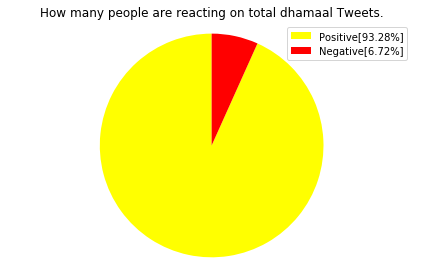

pos


In [ ]:
labels=['Positive['+str(positive)+'%]','Negative['+str(negative)+'%]']
sizes = [positive,negative]
colors = ['yellow','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.legend(patches,labels,loc='best')
plt.title('How many people are reacting on '+text+' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()

print (prob_result.max())
